<h1>PCA</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, Binarizer, KernelCenterer
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
RANDOM_STATE = 78
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
train = pd.read_csv("../../Datasets/train.csv")    #train dataset ../
test  = pd.read_csv("../../Datasets/test.csv")     #test dataset  ../

features = train.columns.drop(['id', 'target']) #dropped id and target 
ids = test['id']
x_train = train.drop(['id', 'target'], axis=1)     #feature matrix
y_train = train['target']                          #target column
x_test = test.drop(['id'], axis=1)

<h3>Attempting PCA with Different Standardization Methods</h3>

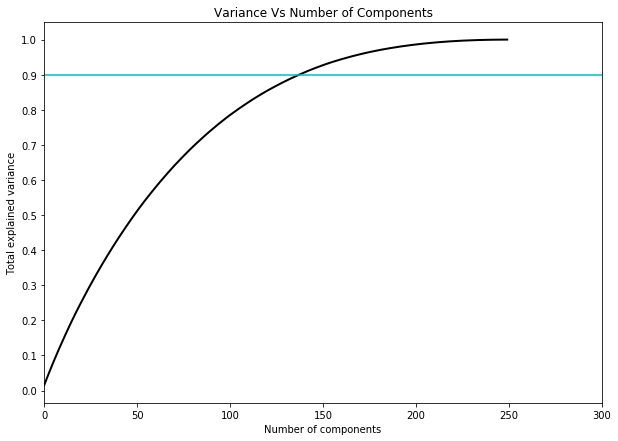

In [3]:
pca = PCA().fit(x_train)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.title("Variance Vs Number of Components")
plt.show()

In [4]:
#Standardising Train and Test data

#Standard Scaler
sc0 = StandardScaler()
X_train0 = sc0.fit_transform(x_train)
X_test0 = sc0.transform(x_test)

#Robust Scaler
sc1 = RobustScaler()
X_train1 = sc1.fit_transform(x_train)
X_test1 = sc1.transform(x_test)

#Binarizer
sc2 = Binarizer()
X_train2 = sc2.fit_transform(x_train)
X_test2 = sc2.transform(x_test)

#Kernel Centerer
sc3 = KernelCenterer()
X_train3 = sc3.fit_transform(x_train)
X_test3 = sc3.transform(x_test)

In [5]:
#Plot function
def plot_pca_train(X0, X1, X2, X3, y_train):
    fig, ax = plt.subplots(2, 2, figsize = (24, 24))
    pca = PCA(n_components=0.9)
    X_reduced0 = pca.fit_transform(X0)
    X_reduced1 = pca.fit_transform(X1)
    X_reduced2 = pca.fit_transform(X2)
    X_reduced3 = pca.fit_transform(X3)
    ax[0,0].scatter(X_reduced0[:, 0], X_reduced0[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,0].set_title('PCA projection StdScalar')
    ax[1,0].scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,0].set_title('PCA projection Robust')
    ax[0,1].scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[0,1].set_title('PCA projection Binarizer')
    ax[1,1].scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y_train,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('bwr', 2))
    ax[1,1].set_title('PCA projection KernelCenterer')
    print(pca.n_components_)

138


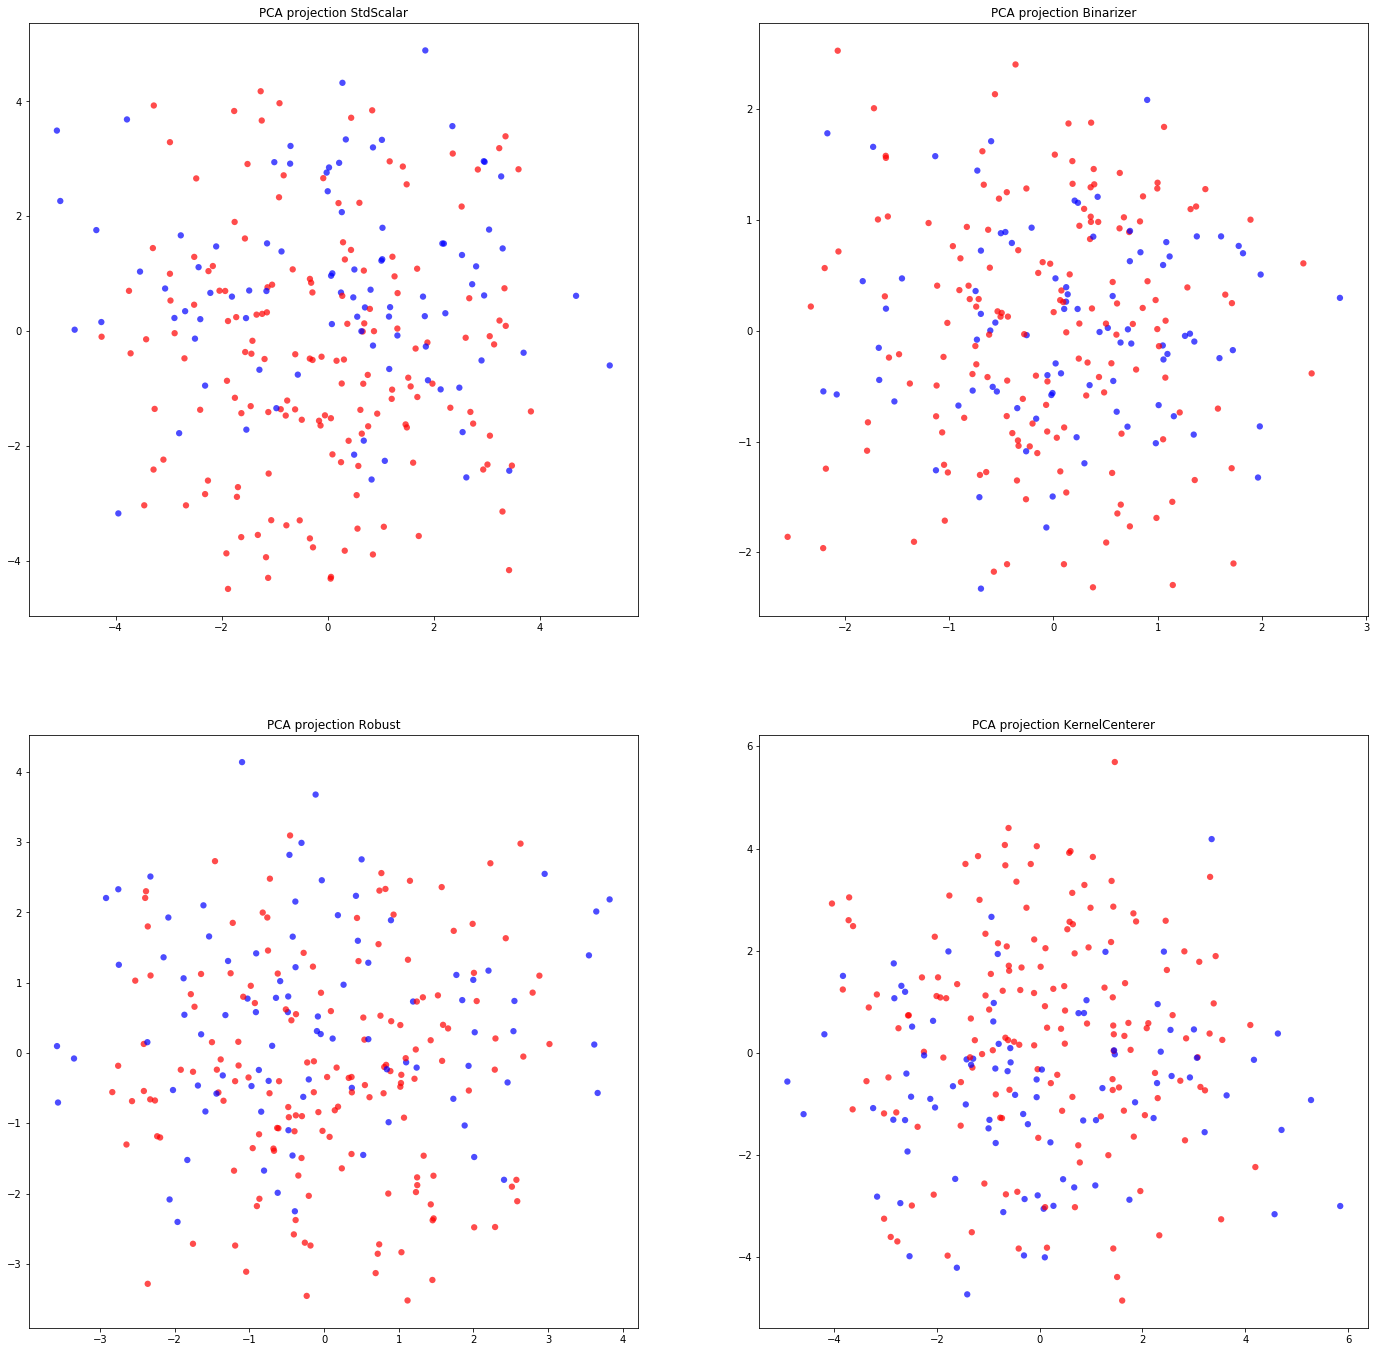

In [6]:
#For Standardized Training Data
plot_pca_train(X_train0, X_train1, X_train2, X_train3, y_train)

<h4>Since, all methods of standardization lead to the same distribution, we will resort to Standard Scaler</h4>

In [7]:
pca = PCA(n_components=0.9)
pca.fit(X_train0)
print("Train Shape : ",X_train0.shape)
print("Test Shape",X_test0.shape)
print("PCA Variance Ratio",pca.explained_variance_ratio_)
X = pca.transform(X_train0)
transformed_test = pca.transform(X_test0)
kf = KFold(n_splits=10)

scores = [] 
best_param = {'C': 0.11248300958542848, 'class_weight': 'balanced', 'max_iter': 50000, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 78, 'solver': 'liblinear'}
#K-fold Validation 
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    model = LogisticRegression(C=0.1, class_weight='balanced', dual=False,fit_intercept=True, intercept_scaling=1, max_iter=100,multi_class='warn', n_jobs=None, penalty='l1', random_state=0,solver='warn', tol=0.0001, verbose=0, warm_start=False);
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    scores.append(score)
print("Average Train Accuracy: ", sum(scores)*100/10, "%")
model.fit(X, y_train)
predictions = model.predict(transformed_test)

#writing results to csv
data = {'id':test['id'], 'target':predictions}
df = pd.DataFrame(data)
df.to_csv('results.csv', index=False)

Train Shape :  (250, 300)
Test Shape (19750, 300)
PCA Variance Ratio [0.01415622 0.01393714 0.01348502 0.01315009 0.01307046 0.0126725
 0.01243153 0.01227743 0.01211999 0.01181826 0.01170782 0.01165683
 0.0115364  0.01140794 0.01121707 0.0111504  0.01081737 0.01071101
 0.0104966  0.0104221  0.01025342 0.01012149 0.01008109 0.00993801
 0.00989862 0.00963252 0.00960297 0.00947231 0.00928126 0.00922146
 0.00910346 0.0089856  0.00896983 0.00884586 0.00869226 0.0086173
 0.0085298  0.00842679 0.0083739  0.00829608 0.00819415 0.00801366
 0.00797007 0.00789624 0.00779693 0.00779394 0.00764892 0.00750039
 0.00745821 0.00742145 0.0073333  0.00722917 0.00713276 0.00709809
 0.00687803 0.00683081 0.00675415 0.00668456 0.00663045 0.00660826
 0.00651001 0.00643364 0.00634674 0.00622924 0.00620219 0.0061603
 0.00607577 0.00604043 0.00596025 0.00589898 0.00581184 0.00570922
 0.00565778 0.00558718 0.00548112 0.00544067 0.00539501 0.00533802
 0.005292   0.00518999 0.0051376  0.00505083 0.00500482 0.00494

<h3>Test Score obtained on Kaggle after PCA :</h3>

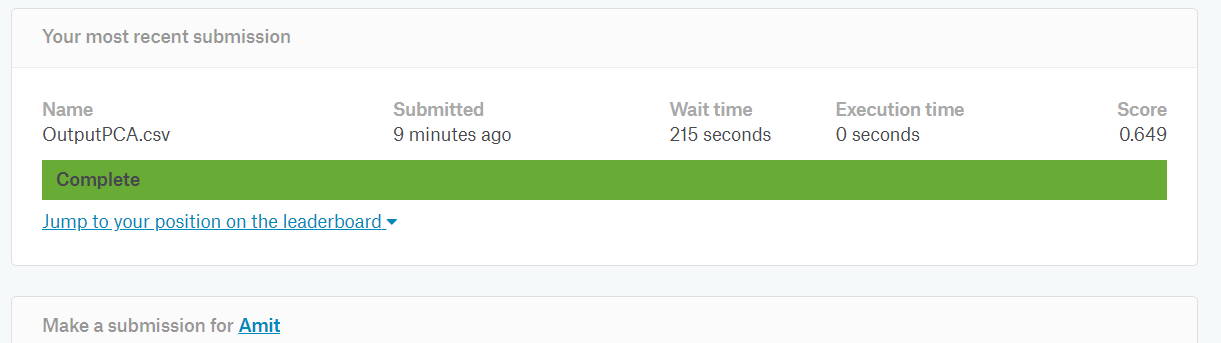